In [12]:
##########################################
#Step 0: Import libraries
##########################################
import os

import pandas as pd

from datetime import date

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

import missingno as msno


In [2]:
##########################################
#Step 1: Import data
##########################################

In [3]:
#Setting directory

os.chdir(r'C:\Users\jlenehan\OneDrive - Intel Corporation\Documents\0 - Data Science\Projects\Auto Recalls\Auto-Recalls')

In [4]:
#Recalls Data
#csv_url = "https://datahub.transportation.gov/resource/6axg-epim.csv"

recalls_data = pd.read_csv("Recalls_data.csv")

recalls_data.head()

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action
0,01/25/2023,23V027000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Kia America, Inc.",Improperly Molded Fuel Tank May Leak,"FUEL SYSTEM, GASOLINE",SC261,Vehicle,34.0,"Kia America, Inc. (Kia) is recalling certain 2...",A fuel leak in the presence of an ignition sou...,"Deales will inspect and replace the fuel tank,..."
1,01/25/2023,23V028000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Hyundai Motor America,Improperly Molded Fuel Tank May Leak,"FUEL SYSTEM, GASOLINE",240,Vehicle,326.0,Hyundai Motor America (Hyundai) is recalling c...,A fuel leak in the presence of an ignition sou...,Dealers will inspect and replace the fuel tank...
2,01/25/2023,23V026000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"BMW of North America, LLC",Pedestrian Warning Sound Malfunction/FMVSS 141,BACK OVER PREVENTION,NR (Not Reported),Vehicle,3431.0,"BMW of North America, LLC (BMW) is recalling c...","Without external warning sounds, pedestrians m...",Dealers will update the external artificial so...
3,01/23/2023,23V017000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Isuzu Motors Limited,Emergency Braking and Steering Control Malfunc...,ELECTRICAL SYSTEM,V2301,Vehicle,242.0,Isuzu Motors Limited (Isuzu) is recalling cert...,An improperly calibrated ADAS camera and ABS m...,Dealers will recalibrate the ADAS camera and A...
4,01/23/2023,23V020000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Alamo Group Inc.,Exhaust Silencer May Detach,EQUIPMENT,NR (Not Reported),Vehicle,56.0,Alamo Group Inc. (Alamo Group) is recalling ce...,A detached exhaust silencer can become a road ...,Gradall Dealers will inspect the exhaust silen...


In [5]:
##########################################
#Step 2: Describe data
##########################################

In [6]:
#Describe recalls dataset
print(recalls_data.columns)
print(recalls_data.info())
print(recalls_data.describe())
print(recalls_data.shape)

print(recalls_data.head())

Index(['Report Received Date', 'NHTSA ID', 'Recall Link', 'Manufacturer',
       'Subject', 'Component', 'Mfr Campaign Number', 'Recall Type',
       'Potentially Affected', 'Recall Description', 'Consequence Summary',
       'Corrective Action'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26616 entries, 0 to 26615
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Report Received Date  26616 non-null  object 
 1   NHTSA ID              26616 non-null  object 
 2   Recall Link           26616 non-null  object 
 3   Manufacturer          26616 non-null  object 
 4   Subject               26616 non-null  object 
 5   Component             26616 non-null  object 
 6   Mfr Campaign Number   26587 non-null  object 
 7   Recall Type           26616 non-null  object 
 8   Potentially Affected  26574 non-null  float64
 9   Recall Description    24215 non-null  object 
 10  Cons

In [15]:
#unique values

print('\nNY Recalls Data - Unique Values:')
for x in recalls_data.columns:
    print(x+':')
    print(recalls_data[x].unique())
    print(str(recalls_data[x].nunique()) + str(' unique values'))


NY Recalls Data - Unique Values:
Report Received Date:
['2023-01-25T00:00:00.000000000' '2023-01-23T00:00:00.000000000'
 '2023-01-20T00:00:00.000000000' ... '1966-09-29T00:00:00.000000000'
 '1966-09-19T00:00:00.000000000' '1966-01-19T00:00:00.000000000']
9548 unique values
NHTSA ID:
['23V027000' '23V028000' '23V026000' ... '66V032001' '66V032003'
 '66V032004']
26616 unique values
Recall Link:
['Go to Recall (https://www.nhtsa.gov/recalls?nhtsaId=23V027000)'
 'Go to Recall (https://www.nhtsa.gov/recalls?nhtsaId=23V028000)'
 'Go to Recall (https://www.nhtsa.gov/recalls?nhtsaId=23V026000)' ...
 'Go to Recall (https://www.nhtsa.gov/recalls?nhtsaId=66V032001)'
 'Go to Recall (https://www.nhtsa.gov/recalls?nhtsaId=66V032003)'
 'Go to Recall (https://www.nhtsa.gov/recalls?nhtsaId=66V032004)']
26616 unique values
Manufacturer:
['Kia America, Inc.' 'Hyundai Motor America' 'BMW of North America, LLC'
 ... 'SS AUTOS, INC.' 'ALGAR ENTERPRISES, INC.' 'ULTRA, INC.']
2935 unique values
Subject:
['Im

In [8]:
##########################################
#Step 3: Clean + Manipulate data
##########################################

In [9]:
#converting to datetime object
recalls_data['Report Received Date']=pd.to_datetime(recalls_data['Report Received Date'])

#Adding year info
recalls_data['year']=pd.DatetimeIndex(recalls_data['Report Received Date']).year

#Adding month info
recalls_data['month']=pd.DatetimeIndex(recalls_data['Report Received Date']).month

#sanity check
recalls_data.head()

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action,year,month
0,2023-01-25,23V027000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Kia America, Inc.",Improperly Molded Fuel Tank May Leak,"FUEL SYSTEM, GASOLINE",SC261,Vehicle,34.0,"Kia America, Inc. (Kia) is recalling certain 2...",A fuel leak in the presence of an ignition sou...,"Deales will inspect and replace the fuel tank,...",2023,1
1,2023-01-25,23V028000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Hyundai Motor America,Improperly Molded Fuel Tank May Leak,"FUEL SYSTEM, GASOLINE",240,Vehicle,326.0,Hyundai Motor America (Hyundai) is recalling c...,A fuel leak in the presence of an ignition sou...,Dealers will inspect and replace the fuel tank...,2023,1
2,2023-01-25,23V026000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"BMW of North America, LLC",Pedestrian Warning Sound Malfunction/FMVSS 141,BACK OVER PREVENTION,NR (Not Reported),Vehicle,3431.0,"BMW of North America, LLC (BMW) is recalling c...","Without external warning sounds, pedestrians m...",Dealers will update the external artificial so...,2023,1
3,2023-01-23,23V017000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Isuzu Motors Limited,Emergency Braking and Steering Control Malfunc...,ELECTRICAL SYSTEM,V2301,Vehicle,242.0,Isuzu Motors Limited (Isuzu) is recalling cert...,An improperly calibrated ADAS camera and ABS m...,Dealers will recalibrate the ADAS camera and A...,2023,1
4,2023-01-23,23V020000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Alamo Group Inc.,Exhaust Silencer May Detach,EQUIPMENT,NR (Not Reported),Vehicle,56.0,Alamo Group Inc. (Alamo Group) is recalling ce...,A detached exhaust silencer can become a road ...,Gradall Dealers will inspect the exhaust silen...,2023,1


In [21]:
recalls_trimmed = recalls_data[['Report Received Date','Manufacturer','Subject','Component','Recall Type','Potentially Affected','Recall Description','Corrective Action','year','month']]
print(recalls_trimmed.head())

print(recalls_trimmed.info())

  Report Received Date               Manufacturer  \
0           2023-01-25          Kia America, Inc.   
1           2023-01-25      Hyundai Motor America   
2           2023-01-25  BMW of North America, LLC   
3           2023-01-23       Isuzu Motors Limited   
4           2023-01-23           Alamo Group Inc.   

                                             Subject              Component  \
0               Improperly Molded Fuel Tank May Leak  FUEL SYSTEM, GASOLINE   
1               Improperly Molded Fuel Tank May Leak  FUEL SYSTEM, GASOLINE   
2     Pedestrian Warning Sound Malfunction/FMVSS 141   BACK OVER PREVENTION   
3  Emergency Braking and Steering Control Malfunc...      ELECTRICAL SYSTEM   
4                        Exhaust Silencer May Detach              EQUIPMENT   

  Recall Type  Potentially Affected  \
0     Vehicle                  34.0   
1     Vehicle                 326.0   
2     Vehicle                3431.0   
3     Vehicle                 242.0   
4     Vehic

In [23]:
affected_missing = recalls_trimmed[recalls_trimmed['Potentially Affected'].isna()]
affected_complete = recalls_trimmed[~recalls_trimmed['Potentially Affected'].isna()]

print(affected_missing.describe())
print(affected_complete.describe())

       Potentially Affected         year      month
count                   0.0    42.000000  42.000000
mean                    NaN  2004.023810   6.309524
std                     NaN     4.999942   3.211930
min                     NaN  1998.000000   1.000000
25%                     NaN  2001.000000   4.000000
50%                     NaN  2002.000000   7.000000
75%                     NaN  2007.750000   9.000000
max                     NaN  2022.000000  12.000000
       Potentially Affected          year         month
count          2.657400e+04  26574.000000  26574.000000
mean           4.633660e+04   2003.135998      6.678934
std            3.832928e+05     15.308455      3.371204
min            0.000000e+00   1966.000000      1.000000
25%            1.012500e+02   1994.000000      4.000000
50%            7.015000e+02   2007.000000      7.000000
75%            6.431750e+03   2016.000000     10.000000
max            3.200000e+07   2023.000000     12.000000


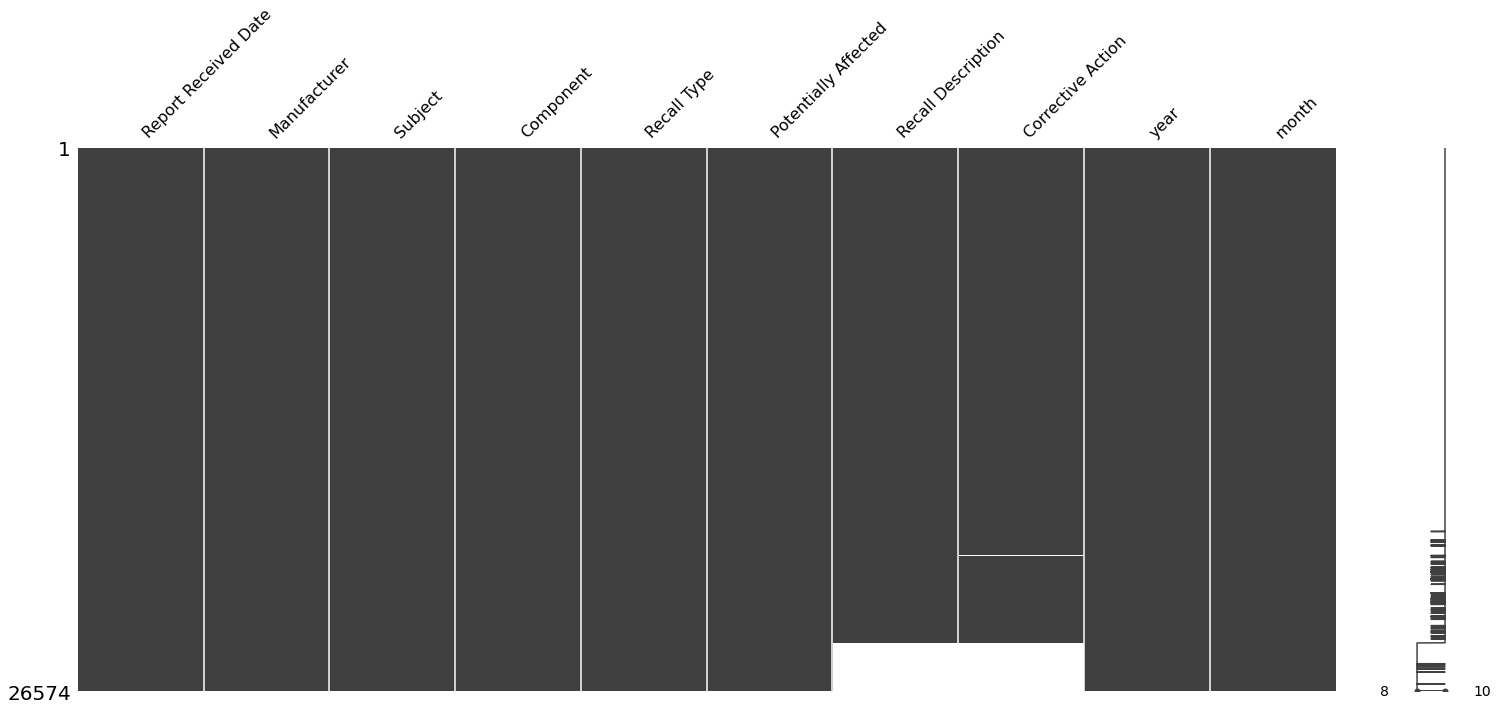

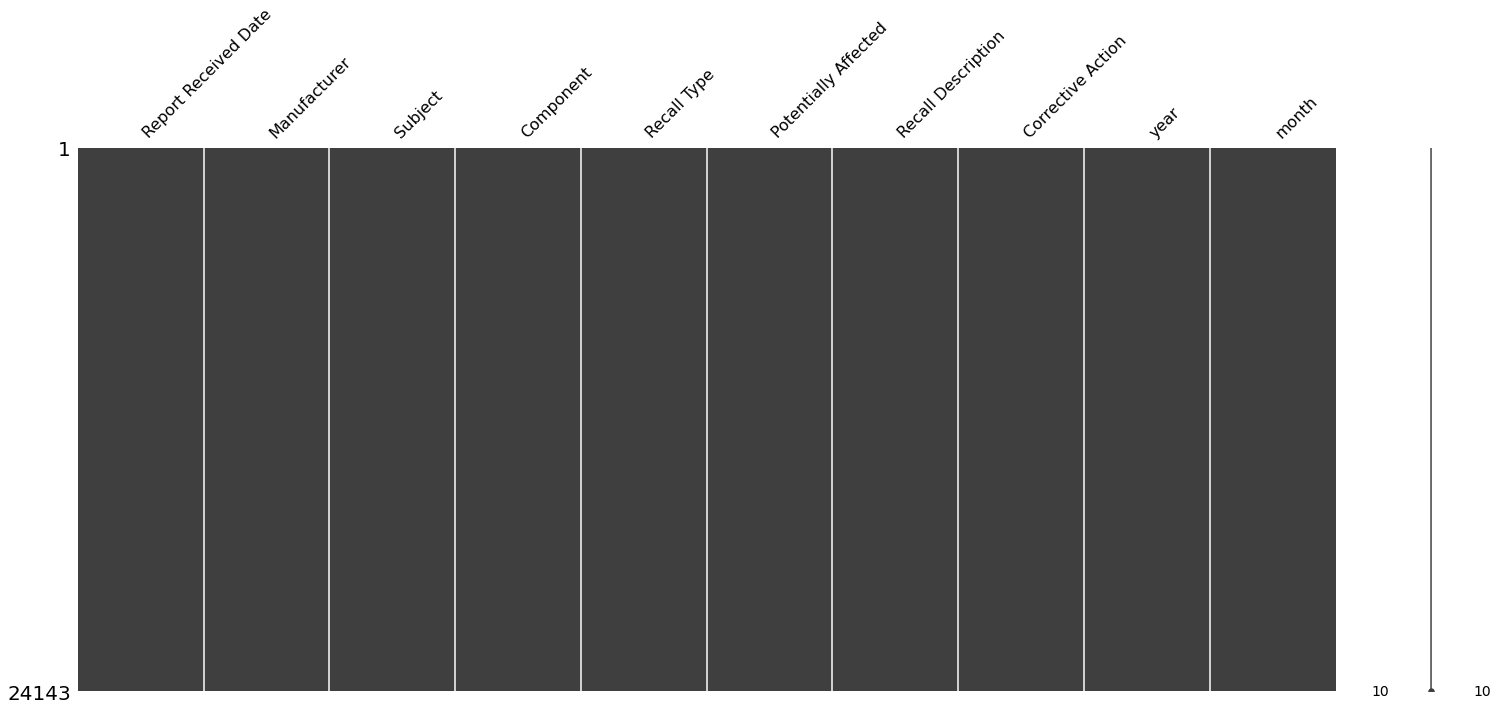

In [31]:
sorted_recalls_trimmed = recalls_trimmed.sort_values(by='Report Received Date',ascending=False)

msno.matrix(sorted_recalls_trimmed)
plt.show()

recalls_trimmed = affected_complete
recalls_trimmed = recalls_trimmed[~(recalls_trimmed['Recall Description'].isna() | recalls_trimmed['Corrective Action'].isna())]

msno.matrix(recalls_trimmed)
plt.show()

In [11]:
##########################################
#Step 4: Plot data
##########################################